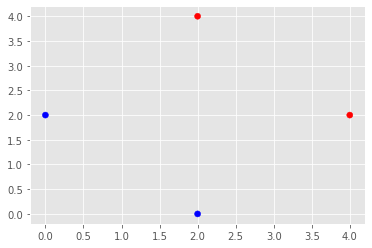

[[2. 0. 1.]
 [0. 2. 1.]
 [4. 2. 1.]
 [2. 4. 1.]]
[[ 5.  1.  9.  5.]
 [ 1.  5.  5.  9.]
 [ 9.  5. 21. 17.]
 [ 5.  9. 17. 21.]]
[[ 5.  1. -9. -5.]
 [ 1.  5. -5. -9.]
 [-9. -5. 21. 17.]
 [-5. -9. 17. 21.]]
[1. 1. 1. 1.]
[1.625 1.625 0.625 0.625]
[ 0.5  0.5 -2. ]
Equation of line: 0.5000000000000036X1 + 0.4999999999999962X2 - 1.9999999999999947 = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


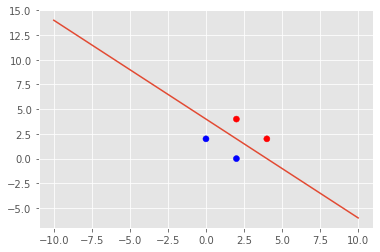

In [1]:

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

def forcalc(points):
    x = np.zeros(shape = (len(points),len(points[0]) + 1))

    for i in range(len(points)):
        x[i] = np.append(points[i],[1])
        
    return x


def finddotprods(x):
    
    arrp = np.zeros(shape = (len(x),len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            arrp[i][j] = np.dot(x[i],x[j])
            
    return arrp

def matlineq(prod, classv):
    mat = np.zeros(shape = (len(prod),len(prod)))
    for i in range(len(prod)):
        for j in range(len(prod)):
            if i==j:
                mat[i][j] = classv[i]*classv[j]*prod[i][j]
            else:
                mat[i][j] = classv[i]*classv[j] * prod[i][j]
                
    
    const = np.ones(shape = (len(prod)))
    return mat,const

def find_wv(soln, classv, x):
    weight_vect = np.zeros(shape = (len(x[0])))
    for i in range(len(soln)):
        weight_vect = weight_vect + soln[i]*classv[i]*x[i]
    return weight_vect

def printeq(weight_vect):
    equ = 'Equation of line: '

    for i in range(len(weight_vect)):

        if weight_vect[i] >= 0 and i!=0:
            equ = equ + ' + '
        elif weight_vect[i]<0:
            equ = equ + ' - '
       
        equ = equ + str(abs(weight_vect[i]))
    
        if i != len(weight_vect)-1:
            equ = equ + str("X" + str(i+1))

    equ = equ + ' = 0'
    
    print(equ)
    
# main method
points = np.array([[2,0],[0,2],[4,2],[2,4]])
classv = np.array([-1,-1,1,1])

#points = np.array([[1,0],[3,1],[3,-1]])
#classv = np.array([-1,1,1])

col_dict = {1:'r', -1:'b'}
plt.scatter(points[:,0],points[:,1], color = [col_dict[classv[i]] for i in range(len(classv))])
plt.show()

x = forcalc(points) 
print(x)

prod = finddotprods(x)
print(prod)

coeff, const = matlineq(prod,classv)
print(coeff)
print(const)

soln = np.linalg.lstsq(coeff,const)
soln = soln[0]
print(soln)

weight_vect = find_wv(soln,classv,x)
print(weight_vect)

printeq(weight_vect)

plt.scatter(points[:,0],points[:,1], color = [col_dict[classv[i]] for i in range(len(classv))])
if weight_vect[1] == 0:
    plt.axvline(x = -weight_vect[2]/weight_vect[0])
else:
    xv = np.linspace(-10, 10, 1000)
    yv = (-weight_vect[2] - weight_vect[0]*xv)/weight_vect[1] 
    plt.plot(xv,yv)
plt.show()
